In [3]:
import numpy as np
from scipy.stats import poisson

# Simulation Parameters
n = 1000  # Number of time steps to analyze
burn_in = 100  # Burn-in period
total_steps = n + burn_in  # Total simulation steps
num_simulations = 100  # Number of Monte Carlo simulations

# Markov chain transition matrix
P = np.array([[0.1, 0.1, 0.8],
              [0.1, 0.1, 0.8],
              [0.8, 0.1, 0.1]])

states = [0, 1, 2]
pi = np.array([0.429, 0.1, 0.471])  # Stationary distribution

# Model parameters for Poisson MS-INGARCH
omega = [1, 2, 3]
alpha = [0.05, 0.1, 0.1]
beta = [0.5, 0.6, 0.7]

# Helper function to simulate Markov chain
def simulate_markov_chain(n, P, states):
    current_state = np.random.choice(states, p=pi)
    chain = [current_state]
    for _ in range(1, n):
        current_state = np.random.choice(states, p=P[current_state])
        chain.append(current_state)
    return np.array(chain)

# Simulate MS-INGARCH
def simulate_ms_ingarch(chain, omega, alpha, beta):
    y = np.zeros(total_steps)
    lambda_t = np.zeros(total_steps)
    for t in range(1, total_steps):
        state = chain[t]
        lambda_t[t] = omega[state] + alpha[state] * y[t-1] + beta[state] * lambda_t[t-1]
        y[t] = poisson.rvs(mu=lambda_t[t])
    # Discard burn-in period
    return y[burn_in:], lambda_t[burn_in:]

# Perform simulations
simulated_data = []
simulated_means = []

for _ in range(num_simulations):
    chain = simulate_markov_chain(total_steps, P, states)
    y, lambda_t = simulate_ms_ingarch(chain, omega, alpha, beta)
    simulated_data.append(y)
    simulated_means.append(lambda_t)

# Convert to arrays
simulated_data = np.array(simulated_data)
simulated_means = np.array(simulated_means)

# Empirical Mean and Variance
empirical_mean = np.mean(simulated_data, axis=0)

# Recalculate Variances
overall_empirical_mean = np.mean(simulated_data)
overall_empirical_variance = np.mean(np.var(simulated_data, axis=1))  # Correctly averaging variances
overall_theoretical_mean = np.mean(simulated_means)
overall_theoretical_variance = overall_theoretical_mean  # Variance of Poisson matches its mean

# Summary for Mean and Variance
mean_summary = {
    "Empirical Mean (Overall)": overall_empirical_mean,
    "Theoretical Mean (Overall)": overall_theoretical_mean
}

variance_summary = {
    "Empirical Variance (Overall)": overall_empirical_variance,
    "Theoretical Variance (Overall)": overall_theoretical_variance
}

mean_summary, variance_summary


({'Empirical Mean (Overall)': 6.12831,
  'Theoretical Mean (Overall)': 6.133558827217706},
 {'Empirical Variance (Overall)': 8.12646753,
  'Theoretical Variance (Overall)': 6.133558827217706})

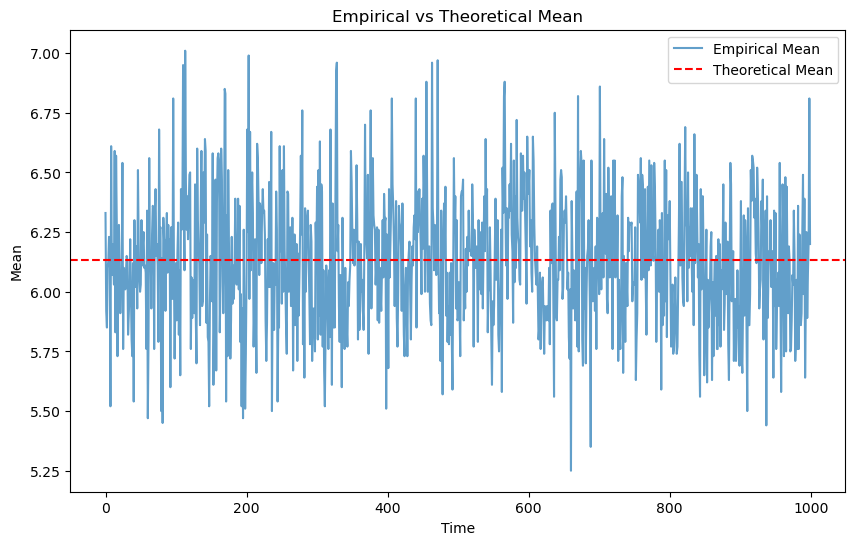

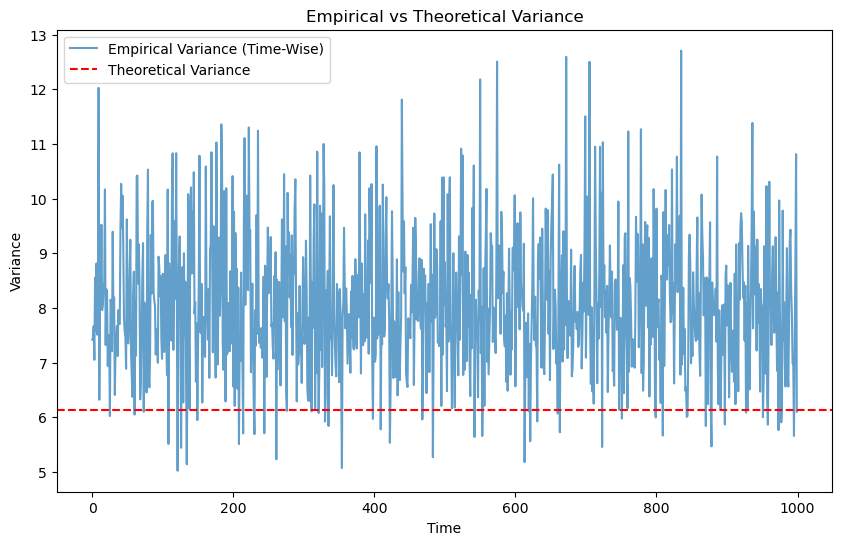

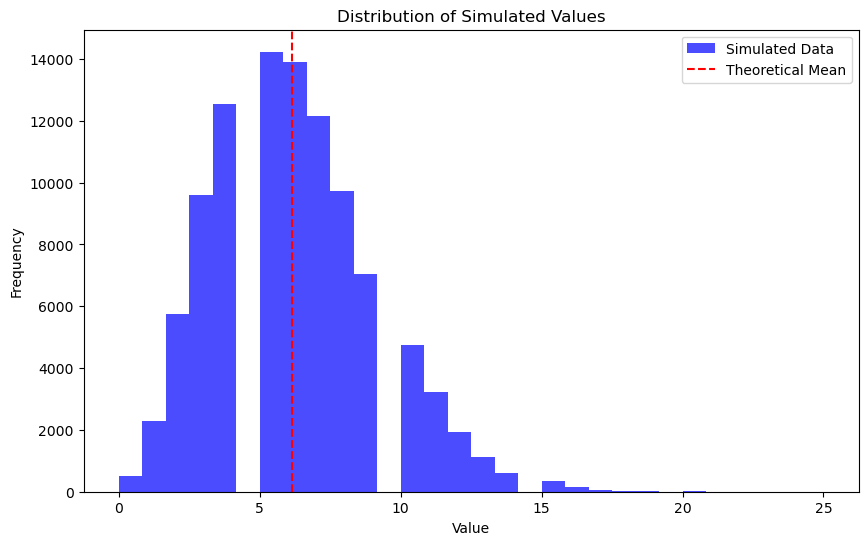

In [4]:
import matplotlib.pyplot as plt

# Recalculate time-wise empirical variance for plotting
empirical_variance = np.var(simulated_data, axis=0)

# Plot empirical vs theoretical mean
plt.figure(figsize=(10, 6))
plt.plot(empirical_mean, label="Empirical Mean", alpha=0.7)
plt.axhline(y=overall_theoretical_mean, color='r', linestyle='--', label="Theoretical Mean")
plt.title("Empirical vs Theoretical Mean")
plt.xlabel("Time")
plt.ylabel("Mean")
plt.legend()
plt.show()

# Plot empirical vs theoretical variance
plt.figure(figsize=(10, 6))
plt.plot(empirical_variance, label="Empirical Variance (Time-Wise)", alpha=0.7)
plt.axhline(y=overall_theoretical_variance, color='r', linestyle='--', label="Theoretical Variance")
plt.title("Empirical vs Theoretical Variance")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.legend()
plt.show()

# Distribution of simulated values (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(simulated_data.flatten(), bins=30, alpha=0.7, color='blue', label="Simulated Data")
plt.axvline(overall_theoretical_mean, color='r', linestyle='--', label="Theoretical Mean")
plt.title("Distribution of Simulated Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [7]:
from scipy.stats import nbinom

# Model parameters for Negative Binomial MS-INGARCH
nu = [5, 10, 15]  # Dispersion parameters for each regime

# Simulate MS-INGARCH for Negative Binomial
def simulate_ms_nb_ingarch(chain, omega, alpha, beta, nu):
    y = np.zeros(total_steps)
    lambda_t = np.zeros(total_steps)
    for t in range(1, total_steps):
        state = chain[t]
        lambda_t[t] = omega[state] + alpha[state] * y[t-1] + beta[state] * lambda_t[t-1]
        p = nu[state] / (nu[state] + lambda_t[t])  # Success probability
        y[t] = nbinom.rvs(nu[state], p)
    # Discard burn-in period
    return y[burn_in:], lambda_t[burn_in:]

# Perform simulations
simulated_data_nb = []
simulated_means_nb = []

for _ in range(num_simulations):
    chain = simulate_markov_chain(total_steps, P, states)
    y, lambda_t = simulate_ms_nb_ingarch(chain, omega, alpha, beta, nu)
    simulated_data_nb.append(y)
    simulated_means_nb.append(lambda_t)

# Convert to arrays
simulated_data_nb = np.array(simulated_data_nb)
simulated_means_nb = np.array(simulated_means_nb)

# Empirical Mean and Variance
empirical_mean_nb = np.mean(simulated_data_nb, axis=0)

# Recalculate Variances
overall_empirical_mean_nb = np.mean(simulated_data_nb)
overall_empirical_variance_nb = np.mean(np.var(simulated_data_nb, axis=1))  # Correctly averaging variances
overall_theoretical_mean_nb = np.mean(simulated_means_nb)
overall_theoretical_variance_nb = np.mean(simulated_means_nb + np.mean(simulated_means_nb)**2 / np.array(nu).mean())

# Summary for Mean and Variance
mean_summary_nb = {
    "Empirical Mean (Overall)": overall_empirical_mean_nb,
    "Theoretical Mean (Overall)": overall_theoretical_mean_nb
}

variance_summary_nb = {
    "Empirical Variance (Overall)": overall_empirical_variance_nb,
    "Theoretical Variance (Overall)": overall_theoretical_variance_nb
}

mean_summary_nb, variance_summary_nb


({'Empirical Mean (Overall)': 6.13931,
  'Theoretical Mean (Overall)': 6.13262984655029},
 {'Empirical Variance (Overall)': 12.250749189999999,
  'Theoretical Variance (Overall)': 9.893544730030234})

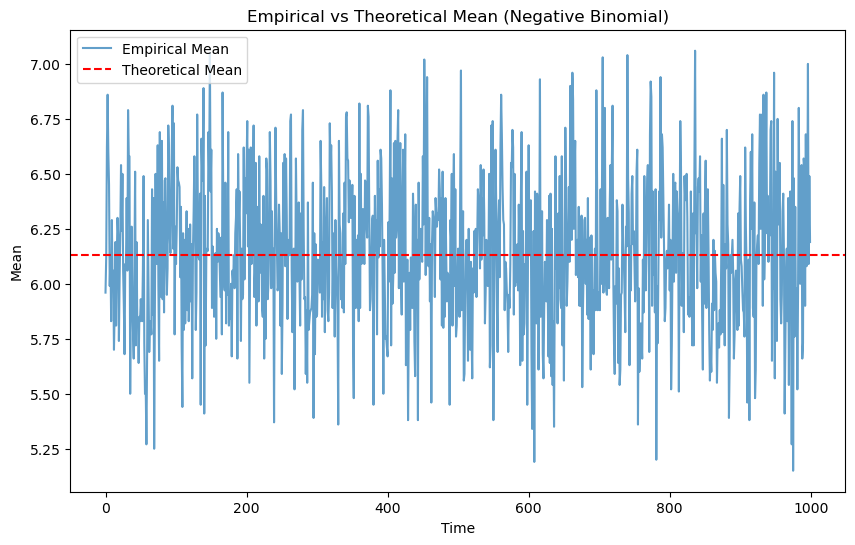

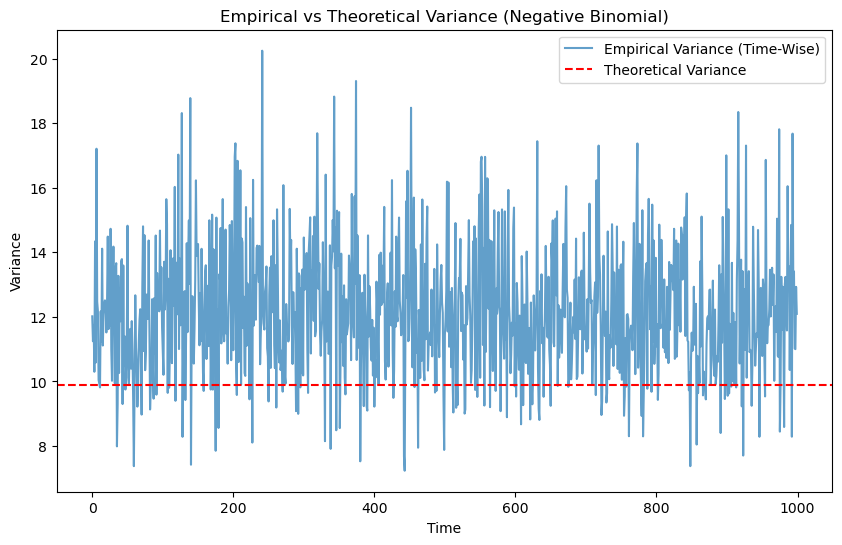

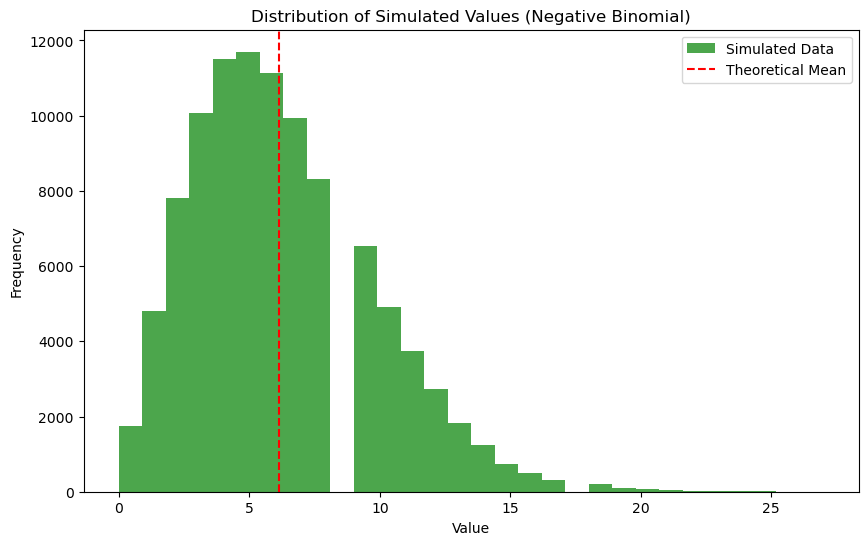

In [8]:

# Recalculate time-wise empirical variance for plotting (Negative Binomial)
empirical_variance_nb = np.var(simulated_data_nb, axis=0)

# Plot empirical vs theoretical mean (Negative Binomial)
plt.figure(figsize=(10, 6))
plt.plot(empirical_mean_nb, label="Empirical Mean", alpha=0.7)
plt.axhline(y=overall_theoretical_mean_nb, color='r', linestyle='--', label="Theoretical Mean")
plt.title("Empirical vs Theoretical Mean (Negative Binomial)")
plt.xlabel("Time")
plt.ylabel("Mean")
plt.legend()
plt.show()

# Plot empirical vs theoretical variance (Negative Binomial)
plt.figure(figsize=(10, 6))
plt.plot(empirical_variance_nb, label="Empirical Variance (Time-Wise)", alpha=0.7)
plt.axhline(y=overall_theoretical_variance_nb, color='r', linestyle='--', label="Theoretical Variance")
plt.title("Empirical vs Theoretical Variance (Negative Binomial)")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.legend()
plt.show()

# Distribution of simulated values (Histogram - Negative Binomial)
plt.figure(figsize=(10, 6))
plt.hist(simulated_data_nb.flatten(), bins=30, alpha=0.7, color='green', label="Simulated Data")
plt.axvline(overall_theoretical_mean_nb, color='r', linestyle='--', label="Theoretical Mean")
plt.title("Distribution of Simulated Values (Negative Binomial)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()
